# AI_campus_ProstateSeg 
# Module 3: Image preprocessing using normalization
### PANDA: Prostate cANcer graDe Assessment (PANDA) Challenge

This notebook walks through methods to pre-process images to make them compatible with machine learning models

## 1. Import the necessary packages

In [130]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import panda_utils as putil
import torch

from PIL import Image
from typing import List, Union, Optional, Dict, Tuple

## 2. Define folder and sub-folder directory names

In [27]:
ROOT_FOLDER = "sample_data"
IMAGE_SUBFOLDER = "train_images"
MASK_SUBFOLDER = "train_label_masks"

image_dir = os.path.join(ROOT_FOLDER, IMAGE_SUBFOLDER)
mask_dir = os.path.join(ROOT_FOLDER, MASK_SUBFOLDER)

## 3. Create list of image and mask files and print contents

In [28]:
image_files = list(filter(lambda file: file != '.DS_Store', sorted(os.listdir(image_dir))))
mask_files = list(filter(lambda file: file != '.DS_Store', sorted(os.listdir(mask_dir))))

In [29]:
image_files

['0018ae58b01bdadc8e347995b69f99aa.tiff',
 '004dd32d9cd167d9cc31c13b704498af.tiff',
 '0068d4c7529e34fd4c9da863ce01a161.tiff',
 '006f6aa35a78965c92fffd1fbd53a058.tiff',
 '007433133235efc27a39f11df6940829.tiff',
 '0076bcb66e46fb485f5ba432b9a1fe8a.tiff',
 '008069b542b0439ed69b194674051964.tiff',
 '00928370e2dfeb8a507667ef1d4efcbb.tiff',
 '00951a7fad040bf7e90f32e81fc0746f.tiff',
 '00a26aaa82c959624d90dfb69fcf259c.tiff']

In [30]:
mask_files

['0018ae58b01bdadc8e347995b69f99aa_mask.tiff',
 '004dd32d9cd167d9cc31c13b704498af_mask.tiff',
 '0068d4c7529e34fd4c9da863ce01a161_mask.tiff',
 '006f6aa35a78965c92fffd1fbd53a058_mask.tiff',
 '007433133235efc27a39f11df6940829_mask.tiff',
 '0076bcb66e46fb485f5ba432b9a1fe8a_mask.tiff',
 '008069b542b0439ed69b194674051964_mask.tiff',
 '00928370e2dfeb8a507667ef1d4efcbb_mask.tiff',
 '00951a7fad040bf7e90f32e81fc0746f_mask.tiff',
 '00a26aaa82c959624d90dfb69fcf259c_mask.tiff']

## 4. Min-max normalization for images

One way to pre-process and normalize images is by using dataset-wide channel-wise statistics. In the following cells, we will calculate the minimum and maximum values of pixels for each of the three channels over the entire toy dataset of 10 images. We will obtain two tuples, one for the minimum values for each channel and one for the maximum values for each channel. Then, each pixel value in each channel will be normalized by that channel's min-max statistic using the following formula:

$$
x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

Read all image files and collect the images into a list. These images have arbitrary dimensions for height and width but they have the same number of channels

Write function to summarize channel wise statistics

In [119]:
def summarize_channel_stats(img: np.ndarray):
    
    """
    Summarize minimum and maximum value for each
    of the three channels in a three-channel image
    
    Parameters
    -----------
    img: np.ndarray (H, W, 3)
        Input image
    
    Returns
    -----------
    Prints channel-wise min and max statistics
    """
    
    assert len(img.shape) == 3 and img.shape[2] == 3
    
    print(f"Channel 1 mean: {img[:, :, 0].mean()}")
    print(f"Channel 2 mean: {img[:, :, 1].mean()}")
    print(f"Channel 3 mean: {img[:, :, 2].mean()}")
    
    print(f"Channel 1 std: {img[:, :, 0].std()}")
    print(f"Channel 2 std: {img[:, :, 1].std()}")
    print(f"Channel 3 std: {img[:, :, 2].std()}")
    
    print(f"Channel 1 min: {img[:, :, 0].min()}")
    print(f"Channel 2 min: {img[:, :, 1].min()}")
    print(f"Channel 3 min: {img[:, :, 2].min()}")
    
    print(f"Channel 1 max: {img[:, :, 0].max()}")
    print(f"Channel 2 max: {img[:, :, 1].max()}")
    print(f"Channel 3 max: {img[:, :, 2].max()}")

Print channel wise statistics for each image

In [121]:
for image_file in image_files:
    img = tifffile.imread(os.path.join(ROOT_FOLDER, IMAGE_SUBFOLDER, image_file))
    print(f"Image file: {image_file}")
    print(summarize_channel_stats(img))
    print("-"*50)

Image file: 0018ae58b01bdadc8e347995b69f99aa.tiff
Channel 1 mean: 244.3410604122599
Channel 2 mean: 233.62176298561147
Channel 3 mean: 237.97409432218114
Channel 1 std: 16.916277627014715
Channel 2 std: 38.70038891215015
Channel 3 std: 28.848696491595135
Channel 1 min: 2
Channel 2 min: 0
Channel 3 min: 0
Channel 1 max: 255
Channel 2 max: 255
Channel 3 max: 255
None
--------------------------------------------------
Image file: 004dd32d9cd167d9cc31c13b704498af.tiff
Channel 1 mean: 247.87385019389066
Channel 2 mean: 240.23861861228943
Channel 3 mean: 243.2778654369441
Channel 1 std: 20.529804239403784
Channel 2 std: 35.808832922265864
Channel 3 std: 28.543364768910973
Channel 1 min: 0
Channel 2 min: 0
Channel 3 min: 0
Channel 1 max: 255
Channel 2 max: 255
Channel 3 max: 255
None
--------------------------------------------------
Image file: 0068d4c7529e34fd4c9da863ce01a161.tiff
Channel 1 mean: 245.41667284185863
Channel 2 mean: 238.36947511915915
Channel 3 mean: 241.8642182526765
Channel

Read all arbitrarily shaped image files into a list

In [122]:
image_list = []
for image_file in image_files:
    img = tifffile.imread(os.path.join(ROOT_FOLDER, IMAGE_SUBFOLDER, image_file))
    image_list.append(img)

In [123]:
print(f"Total number of images: {len(image_list)}")

Total number of images: 10


Write function to iteratively calculate dataset-wide channel-wise statistics for minimum and maximum to be used in normalization of entire dataset. This function will go through a list of arbitrarily shaped images (but with same number of channels) and then calculate the minimum and maximum for each channel in each image. Then, it will calculate the minimum over all minimums and the maximum over all maximums in the entire dataset and return it. 

In [124]:
def aggregate_channel_minmax(image_list: List[np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Find aggregate channel range (minimum and maximum)
    for each channel over the entire dataset. 

    Parameters
    -----------
    image_list: List[np.ndarray]
        List of images with arbitrary sizes (H or W)
        but same number of channels in each of them
        (function will verify that all images in the passed
        list contain the same number of channels with channel
        count stored in the last dimension)

    Returns
    ----------
    min_vals: np.ndarray
        Array containing the dataset-wide minimum for each
        channel

    max_vals: np.ndarray
        Array containing the dataset-wide maximum for each
        channel
    """
    
    min_arrays, max_arrays = [], []

    n_dims = len(image_list[0].shape)
    n_channels = image_list[0].shape[-1]

    for img in image_list:
        assert len(img.shape) == n_dims
        assert img.shape[-1] == n_channels
        min_arrays.append(img.min(axis=(0, 1)))
        max_arrays.append(img.max(axis=(0, 1)))

    min_arrays = np.stack(min_arrays)
    max_arrays = np.stack(max_arrays)

    min_vals = np.min(min_arrays, axis = 0)
    max_vals = np.max(max_arrays, axis = 0)
    
    return min_vals, max_vals

In [125]:
min_vals, max_vals = aggregate_channel_minmax(image_list)

Print tuple of minimum values for all the three channels over the entire dataset

In [127]:
print(min_vals)

[0 0 0]


Print tuple of maximum values for all the three channels over the entire dataset

In [128]:
print(max_vals)

[255 255 255]


Since we will operate on tiles of fixed size, as extracted from whole images of arbitrary sizes, we will perform normalization on the tiles using min-max normalization. We will extract non-overlapping tiles from an image, and collect them into a batched tensor. 

In [129]:
# sample a random image from the toy dataset in order to extract non overlapping tiles from it
sample_image = image_list[0]

Print the dimensionality of this sampled image

In [143]:
print(sample_image.shape)

(25344, 5888, 3)


Plot a random square tile of size 224 by 224 from the sample image

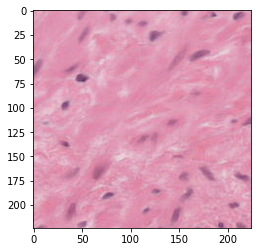

In [236]:
plt.imshow(sample_image[2000:2000+224, 2000:2000+224, :])

Write function to extract non-overlapping square tiles of fixed, given size

In [237]:
def extract_nonoverlapping_tiles(image,
                                 tile_size = 224):
    
    R, C, n_channels = image.shape
    tiles = []
    for i in range(0, R, tile_size):
        for j in range(0, C, tile_size):
            try:
                tile = image[i : i + tile_size, j : j + tile_size, :]
                if tile.shape == (tile_size, tile_size, n_channels):
                    tiles.append(tile)
            except IndexError:
                print(f"Skipping tile at position ({i}, {j})")
    return tiles

In [238]:
tiles = extract_nonoverlapping_tiles(sample_image)

In [239]:
print(f"Number of tiles extracted: {len(tiles)}")

Number of tiles extracted: 2938


In [240]:
print(f"Shape of one tile: {tiles[0].shape}")

Shape of one tile: (224, 224, 3)


Ensure all extracted tiles are of the same shape

In [241]:
for tile in tiles:
    if tile.shape != (224, 224, 3):
        raise ValueError("Anomalous tile found")

Plot a random tile with some signal

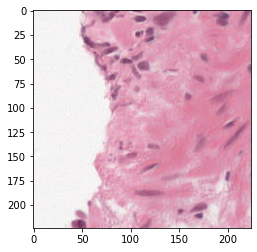

In [242]:
plt.imshow(tiles[293])

Print raw values of image

In [218]:
tiles[293]

array([[[244, 243, 243],
        [244, 243, 243],
        [244, 243, 243],
        ...,
        [154,  92, 125],
        [167, 102, 135],
        [187, 117, 148]],

       [[244, 243, 243],
        [244, 243, 243],
        [244, 243, 243],
        ...,
        [162,  91, 136],
        [177, 104, 143],
        [195, 121, 152]],

       [[244, 243, 243],
        [244, 243, 243],
        [244, 243, 243],
        ...,
        [170,  94, 139],
        [187, 112, 146],
        [203, 131, 152]],

       ...,

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [224, 180, 200],
        [224, 185, 201],
        [224, 186, 198]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [219, 176, 197],
        [221, 182, 199],
        [223, 185, 198]],

       [[244, 244, 245],
        [244, 244, 245],
        [244, 244, 245],
        ...,
        [220, 177, 197],
        [222, 179, 199],
        [227, 180, 200]]

Write class to perform min max normalization by channel using channel wide statistics. This class will have the option of taking arrays for minimum values and maximum values per channel. It will also have a fit method to calculate channel wise statistics from a dataset of shape (BATCH, # CHANNELS, HEIGHT, WIDTH). It will have a transform method to normalize a dataset, and a fit_transform method. 

In [244]:
class ChannelWiseMinMaxNormalizer:
    """
    Channel-wise min max
    normalizer
    """
    def __init__(self,
                 min_values = None,
                 max_values = None):
        
        self.min_values = min_values
        self.max_values = max_values

    def fit(self, 
            dataset: torch.tensor):
        """
        Calculate dataset-wide per-channel
        minimum and maximum values 
        """
        self.min_values = torch.amin(dataset, dim=(0, 2, 3))
        self.max_values = torch.amax(dataset, dim=(0, 2, 3))

    def transform(self, 
                  to_transform: torch.tensor) -> torch.tensor:
        """
        Transform dataset by 
        (value - min)/(max - min)
        using per-channel
        min and max statistics
        """
        if self.min_values is None or self.max_values is None:
            raise ValueError("Fit min and max values pre-transformation or input external values")

        normalized_dataset = (to_transform - self.min_values[None, :, None, None]) / (self.max_values[None, :, None, None] - self.min_values[None, :, None, None])

        return normalized_dataset
        
    
    def fit_transform(self, 
                      to_transform: torch.tensor) -> torch.tensor:
        """
        Fit and Transform dataset by 
        (value - min)/(max - min)
        using per-channel
        min and max statistics
        """
        self.fit(to_transform)
        
        return self.transform(to_transform)

The minimum and maximum values is a numpy array, convert that to pytorch tensors and instantiate the normalizer class

In [245]:
min_vals = torch.tensor(min_vals)
max_vals = torch.tensor(max_vals)

normalizer = ChannelWiseMinMaxNormalizer(min_values = min_vals,
                                         max_values = max_vals)

/var/folders/70/hy2r56_j0wb9862yd1584x340000gn/T/ipykernel_83043/883031732.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  min_vals = torch.tensor(min_vals)
/var/folders/70/hy2r56_j0wb9862yd1584x340000gn/T/ipykernel_83043/883031732.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  max_vals = torch.tensor(max_vals)


Convert tiles to a pytorch tensor, print its shape and then permute the dimensions such that the tensor is of shape: [Batch, number of channels, tile size, tile size]

In [246]:
tiles = torch.from_numpy(np.stack(tiles))
print(tiles.shape)
tiles = tiles.permute(0, 3, 1, 2)
print(tiles.shape)

torch.Size([2938, 224, 224, 3])
torch.Size([2938, 3, 224, 224])


Normalize tiles

In [222]:
transformed = normalizer.transform(tiles)

Print dimensionality of normalized tensor and ensure it is preserved

In [247]:
transformed.shape

torch.Size([2938, 3, 224, 224])

Re-plot same tile that was plotted before. It's appearance is consistent with the unnormalized, raw version. 

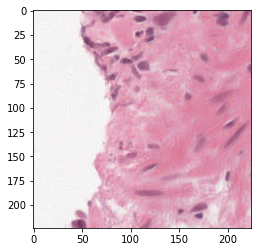

In [248]:
plt.imshow(transformed[293].permute(1,2,0).numpy())

Print raw values of the normalized tile. 

In [249]:
transformed[293].permute(1,2,0).numpy()

array([[[0.9574871 , 0.95355684, 0.9536581 ],
        [0.9574871 , 0.95355684, 0.9536581 ],
        [0.9574871 , 0.95355684, 0.9536581 ],
        ...,
        [0.6096541 , 0.36914745, 0.497963  ],
        [0.6598967 , 0.40785006, 0.5365813 ],
        [0.73719287, 0.46590397, 0.58678496]],

       [[0.9574871 , 0.95355684, 0.9536581 ],
        [0.9574871 , 0.95355684, 0.9536581 ],
        [0.9574871 , 0.95355684, 0.9536581 ],
        ...,
        [0.6405726 , 0.36527717, 0.54044306],
        [0.6985448 , 0.41559055, 0.56747586],
        [0.76811135, 0.481385  , 0.6022322 ]],

       [[0.9574871 , 0.95355684, 0.9536581 ],
        [0.9574871 , 0.95355684, 0.9536581 ],
        [0.9574871 , 0.95355684, 0.9536581 ],
        ...,
        [0.6714911 , 0.37688795, 0.55202854],
        [0.73719287, 0.44655266, 0.5790613 ],
        [0.7990299 , 0.5200876 , 0.6022322 ]],

       ...,

       [[0.9574871 , 0.9574271 , 0.95751995],
        [0.9574871 , 0.9574271 , 0.95751995],
        [0.9574871 , 0